In [1]:
import numpy as np
from tqdm import tqdm
from mpc import MPCControl
import matplotlib.pyplot as plt

from visualise import (
    plot_3d_control,
    plot_action_history,
    plot_state_history,
    plot_terminal_cost_lyupanov,
)

from terminal_set import calculate_c

from main import simulate
import scipy.linalg as la

In [8]:
dt = 0.10  # Sampling period
N = 10  # MPC Horizon
T = 100  # Duration of simulation
x_init = np.zeros(12)  # Initial conditions
x_target = np.zeros(12)  # State to reach
x_target[0:3] = np.array([0.1, 0.0, 0.0])
x_target[3:6] = np.array([0.0, 0.0, 0.0])

print("Initial state is ", x_init)
print("Target state to reach is ", x_target)

# Controller
ctrl = MPCControl(
    mpc_horizon=N,
    timestep_mpc_stages=dt,
    terminal_set_level_c=30,
    use_terminal_set=True,
    use_terminal_cost=True,
)

print("Terminal cost ", ctrl.use_terminal_cost)
print("Terminal set ", ctrl.use_terminal_set)

ctrl.c = calculate_c(ctrl, x_target, use_state_constraints =True)
ctrl._buildMPCProblem()

print("C is ", ctrl.c)


Initial state is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Target state to reach is  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Terminal cost  True
Terminal set  True
C is  0.04136764666071198


Simulating: 100%|██████████| 100/100 [00:03<00:00, 31.88it/s]


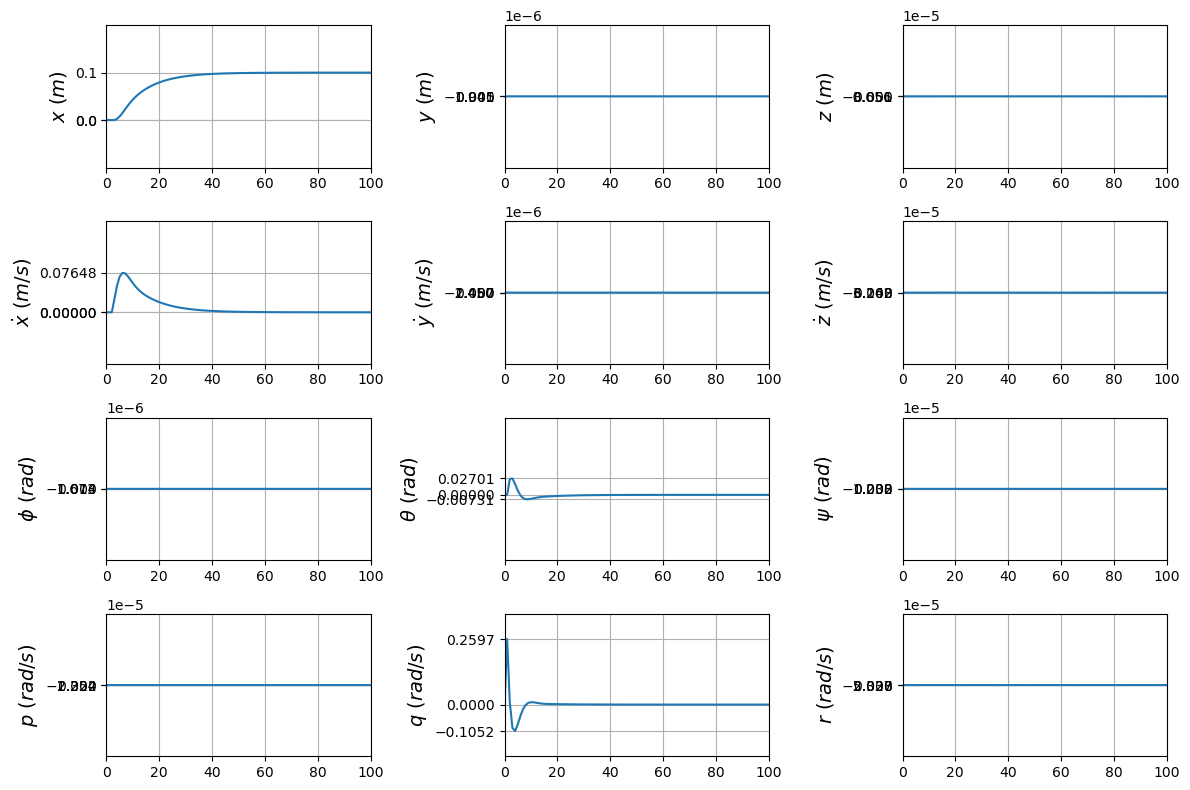

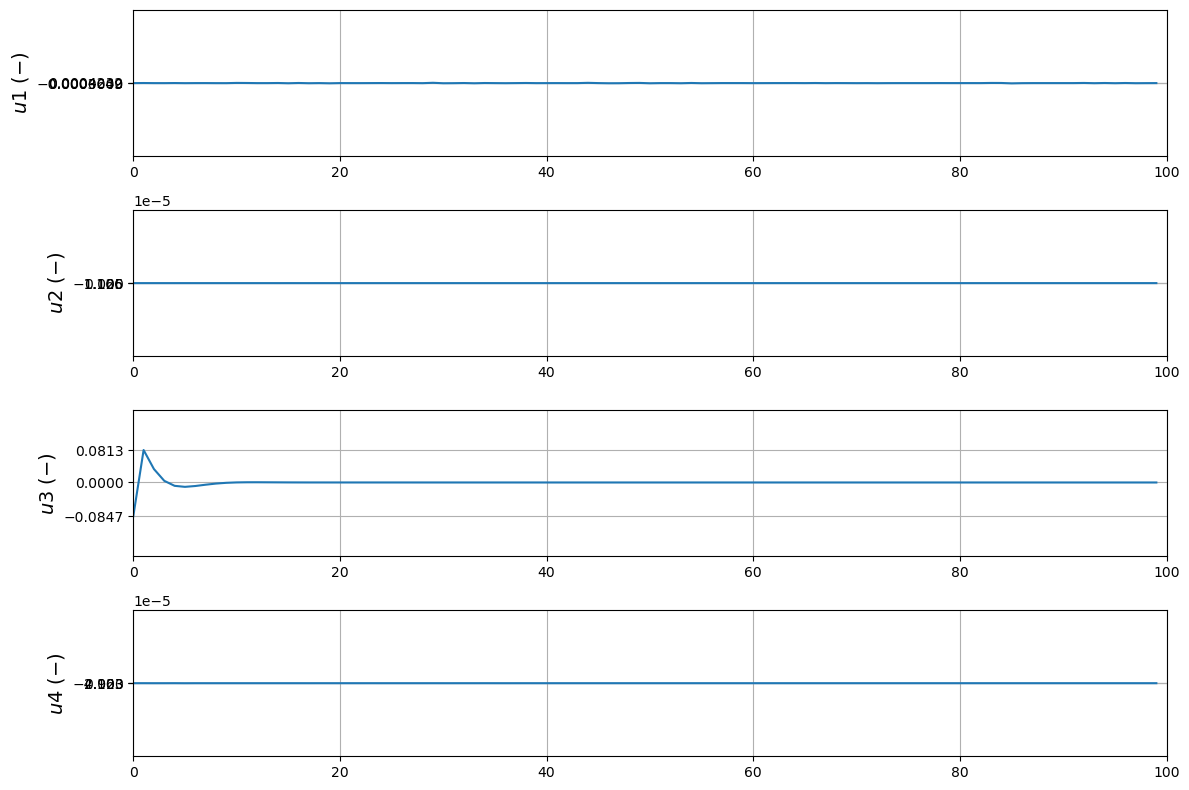

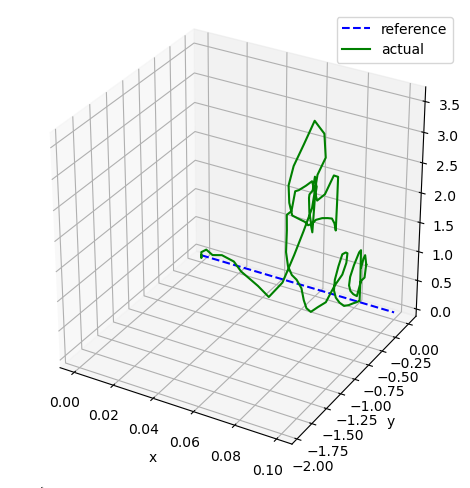

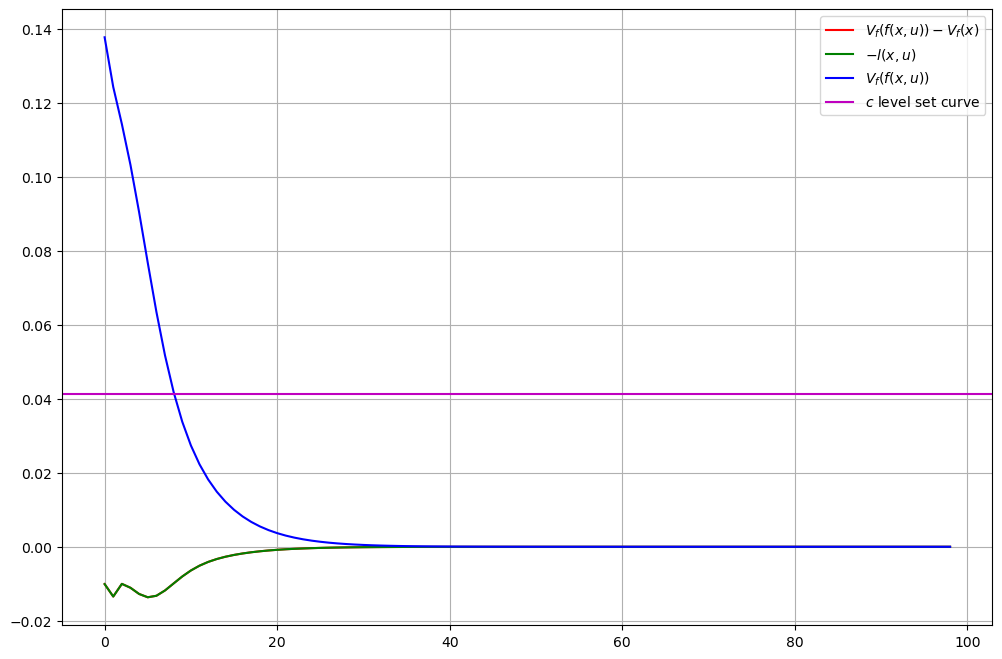

In [9]:
states, inputs, plans, timesteps = simulate(
    controller=ctrl,
    x_init=x_init,
    x_target=x_target,
    dt=dt,
    T=T,
    N=N,
    plot=True,
    use_terminal=ctrl.use_terminal_cost,
)

Vf